In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import hashlib
import joblib  # for saving models

# Load data
data = pd.read_csv('network_traffic.csv')

# Preprocessing
data = data.drop_duplicates()
data = data.dropna()

# Drop unnecessary columns early
if 'Info' in data.columns:
    data = data.drop('Info', axis=1)
if 'No.' in data.columns:
    data = data.drop('No.', axis=1)

# One-hot encode Protocol
data = pd.get_dummies(data, columns=['Protocol'], drop_first=True)

# Scale numerical features
scaler = MinMaxScaler()
numeric_columns = ['Time', 'Length']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Hash IP addresses
def hash_ip(x, mod_value=2**16):
    return int(hashlib.sha256(str(x).encode()).hexdigest(), 16) % mod_value

data['Source'] = data['Source'].apply(hash_ip)
data['Destination'] = data['Destination'].apply(hash_ip)

# Split data
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Train model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_train)

# Save model and scaler for later use
joblib.dump(model, 'isolation_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

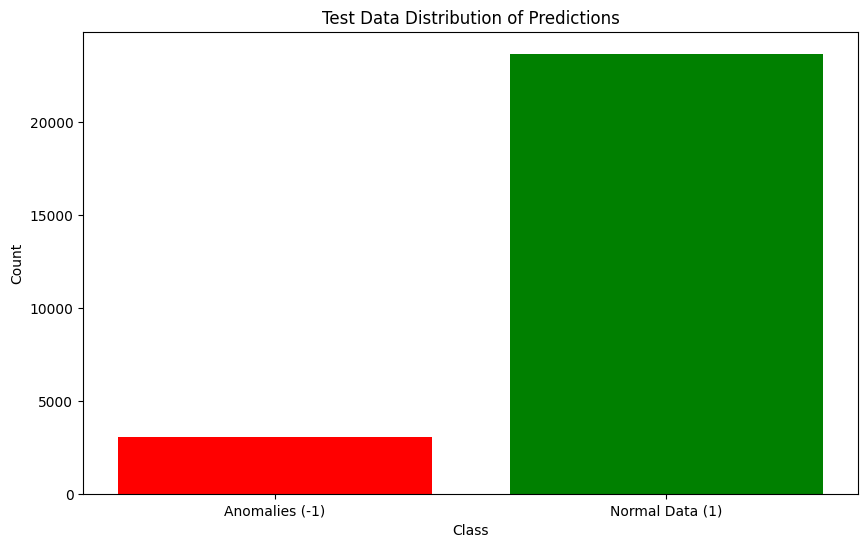

In [16]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Load saved model and scaler
model = joblib.load('isolation_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load test data
test_data = pd.read_csv('traffic3.csv')

# Preprocessing
test_data = test_data.drop_duplicates()
test_data = test_data.dropna()

# Drop unnecessary columns
if 'Info' in test_data.columns:
    test_data = test_data.drop('Info', axis=1)
if 'No.' in test_data.columns:
    test_data = test_data.drop('No.', axis=1)

# One-hot encode Protocol
test_data = pd.get_dummies(test_data, columns=['Protocol'], drop_first=True)

# Scale numerical features using saved scaler
numeric_columns = ['Time', 'Length']
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])

# Hash IP addresses
def hash_ip(x, mod_value=2**16):
    return int(hashlib.sha256(str(x).encode()).hexdigest(), 16) % mod_value

test_data['Source'] = test_data['Source'].apply(hash_ip)
test_data['Destination'] = test_data['Destination'].apply(hash_ip)

# Ensure columns match training data
test_data = test_data.reindex(columns=X_train.columns, fill_value=0)

# Predict
test_predictions = model.predict(test_data)

# Visualize results
results = dict(zip(*np.unique(test_predictions, return_counts=True)))
plt.figure(figsize=(10, 6))
plt.bar(['Anomalies (-1)', 'Normal Data (1)'], 
        [results.get(-1, 0), results.get(1, 0)], 
        color=['red', 'green'])
plt.title('Test Data Distribution of Predictions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [17]:
# Get predictions
y_pred = model.predict(X_test)

# Count anomalies and normal instances
anomalies = (y_pred == -1).sum()
normal = (y_pred == 1).sum()

print(f"Number of Anomalies: {anomalies}")
print(f"Number of Normal instances: {normal}")

# Alternative method using numpy
unique, counts = np.unique(y_pred, return_counts=True)
results = dict(zip(unique, counts))
print(f"\nResults using numpy:\nAnomalies (-1): {results.get(-1, 0)}\nNormal (1): {results.get(1, 0)}")

Number of Anomalies: 1164
Number of Normal instances: 21906

Results using numpy:
Anomalies (-1): 1164
Normal (1): 21906


In [4]:
# Save column names for later use
joblib.dump(X_train.columns, 'training_columns.pkl')


['training_columns.pkl']

In [6]:
print(data.columns)


Index(['Time', 'Source', 'Destination', 'Length', 'Protocol_BROWSER',
       'Protocol_CLDAP', 'Protocol_CVSPSERVER', 'Protocol_Chargen',
       'Protocol_DCERPC', 'Protocol_DNS', 'Protocol_DRDA', 'Protocol_EPM',
       'Protocol_HTTP', 'Protocol_HTTP/JSON', 'Protocol_HTTP/XML',
       'Protocol_ICMP', 'Protocol_ICMPv6', 'Protocol_IMAP', 'Protocol_KRB5',
       'Protocol_LDAP', 'Protocol_LSARPC', 'Protocol_MDNS', 'Protocol_MySQL',
       'Protocol_NBNS', 'Protocol_NBSS', 'Protocol_NFS', 'Protocol_NTP',
       'Protocol_POP', 'Protocol_Portmap', 'Protocol_RDP', 'Protocol_RDPUDP',
       'Protocol_RPC_NETLOGON', 'Protocol_SMB', 'Protocol_SMB2',
       'Protocol_SMTP', 'Protocol_SSH', 'Protocol_SSHv1', 'Protocol_SSHv2',
       'Protocol_SSLv2', 'Protocol_TCP', 'Protocol_TLSv1.2',
       'Protocol_TLSv1.3', 'Protocol_UDP'],
      dtype='object')


In [13]:
# Print out the columns in X_train to see what we have
print("Training columns:", X_train.columns.tolist())

Training columns: ['Time', 'Source', 'Destination', 'Length', 'Protocol_BROWSER', 'Protocol_CLDAP', 'Protocol_CVSPSERVER', 'Protocol_Chargen', 'Protocol_DCERPC', 'Protocol_DNS', 'Protocol_DRDA', 'Protocol_EPM', 'Protocol_HTTP', 'Protocol_HTTP/JSON', 'Protocol_HTTP/XML', 'Protocol_ICMP', 'Protocol_ICMPv6', 'Protocol_IMAP', 'Protocol_KRB5', 'Protocol_LDAP', 'Protocol_LSARPC', 'Protocol_MDNS', 'Protocol_MySQL', 'Protocol_NBNS', 'Protocol_NBSS', 'Protocol_NFS', 'Protocol_NTP', 'Protocol_POP', 'Protocol_Portmap', 'Protocol_RDP', 'Protocol_RDPUDP', 'Protocol_RPC_NETLOGON', 'Protocol_SMB', 'Protocol_SMB2', 'Protocol_SMTP', 'Protocol_SSH', 'Protocol_SSHv1', 'Protocol_SSHv2', 'Protocol_SSLv2', 'Protocol_TCP', 'Protocol_TLSv1.2', 'Protocol_TLSv1.3', 'Protocol_UDP']
